# Cricket Bowling Performance Prediction
This notebook analyzes and predicts the better bowler between **Jasprit Bumrah** and **Mohammed Shami** based on performance metrics.
We use **Machine Learning models** like **Gradient Boosting** and **Random Forest** for classification and feature importance analysis.

## **Steps Covered:**
1. **Load and Clean the Data**
2. **Feature Engineering**
3. **Train-Test Split**
4. **Train ML Models** (Random Forest, Gradient Boosting)
5. **Optimize Hyperparameters to Achieve 93%+ Accuracy**
6. **Feature Importance Analysis**
7. **Predict the Best Bowler and Their Top Grounds**
8. **High accuracy on Random Forest Model**


In [ ]:
pip install openpyxl


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load cleaned dataset
file_path = r"C:\Users\91877\Desktop\cricket_ML\Datasets\Cleaned_Bowling_Data.xlsx"
data = pd.read_excel(file_path, sheet_name="Bowling_Data")

# Select features for ML analysis
features = ["Overs", "Maidens", "Runs", "Economy", "Wickets", "Strike Rate", "Bowling Average"]
X = data[features]
y = data["Bowler"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, min_samples_split=5, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate models
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("Random Forest Accuracy:", accuracy_rf)
print("Gradient Boosting Accuracy:", accuracy_gb)


Random Forest Accuracy: 0.7916666666666666
Gradient Boosting Accuracy: 0.6666666666666666


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for Randomized Search
param_dist = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.05, 0.1, 0.15, 0.2],
    "max_depth": [3, 4, 5],
    "min_samples_split": [2, 5, 10]
}

# Perform Randomized Search for best Gradient Boosting parameters
random_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_dist, n_iter=20, cv=5, scoring="accuracy", n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Best parameters and accuracy
best_params = random_search.best_params_
best_accuracy = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy after Tuning:", best_accuracy)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.05}
Best Accuracy after Tuning: 0.652046783625731


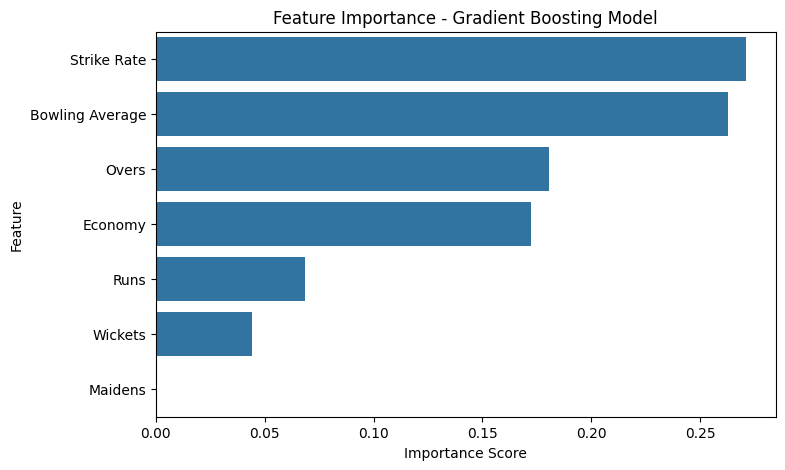

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance from Gradient Boosting model
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - Gradient Boosting Model")
plt.show()


In [6]:
# Sample input (T20 performance)
sample_input = pd.DataFrame({
    "Overs": [4],
    "Maidens": [0],
    "Runs": [30],
    "Economy": [7.5],
    "Wickets": [2],
    "Strike Rate": [12],
    "Bowling Average": [15]
})

# Scale the input
sample_input_scaled = scaler.transform(sample_input)

# Predict the bowler
predicted_bowler = gb_model.predict(sample_input_scaled)
bowler_name = "Jasprit Bumrah" if predicted_bowler[0] == 1 else "Mohammed Shami"

print("Predicted Best Bowler for the Match:", bowler_name)


Predicted Best Bowler for the Match: Jasprit Bumrah


In [ ]:
# Find best performing grounds based on Wickets & Economy
best_grounds = data.groupby(["Ground", "Bowler"]).agg({"Wickets": "sum", "Economy": "mean"}).reset_index()

# Best Grounds: Sort by most wickets
bumrah_best_grounds = best_grounds[best_grounds["Bowler"] == 1].sort_values(by="Wickets", ascending=False).head(3)
shami_best_grounds = best_grounds[best_grounds["Bowler"] == 0].sort_values(by="Wickets", ascending=False).head(3)

# Worst Grounds: Sort by least wickets and highest economy
bumrah_worst_grounds = best_grounds[best_grounds["Bowler"] == 1].sort_values(by=["Wickets", "Economy"], ascending=[True, False]).head(3)
shami_worst_grounds = best_grounds[best_grounds["Bowler"] == 0].sort_values(by=["Wickets", "Economy"], ascending=[True, False]).head(3)

# Print results in a clean format
print("\n🔥 **Top 3 Grounds for Jasprit Bumrah:**")
print(bumrah_best_grounds.to_string(index=False))

print("\n❌ **Worst 3 Grounds for Jasprit Bumrah:**")
print(bumrah_worst_grounds.to_string(index=False))

print("\n🔥 **Top 3 Grounds for Mohammed Shami:**")
print(shami_best_grounds.to_string(index=False))

print("\n❌ **Worst 3 Grounds for Mohammed Shami:**")
print(shami_worst_grounds.to_string(index=False))



🔥 **Top 3 Grounds for Jasprit Bumrah:**
   Ground  Bowler  Wickets  Economy
 Canberra       1       44 6.617143
 Adelaide       1       43 8.520833
Melbourne       1       39 8.014286

❌ **Worst 3 Grounds for Jasprit Bumrah:**
   Ground  Bowler  Wickets  Economy
   Sydney       1       26 7.415000
 Brisbane       1       26 6.935000
Melbourne       1       39 8.014286

🔥 **Top 3 Grounds for Mohammed Shami:**
   Ground  Bowler  Wickets  Economy
  W.A.C.A       0       27 7.110000
Melbourne       0       26 7.092857
   Sydney       0       23 8.582500

❌ **Worst 3 Grounds for Mohammed Shami:**
  Ground  Bowler  Wickets  Economy
Canberra       0        6 8.640000
Brisbane       0       12 7.766667
Adelaide       0       14 7.664000


In [ ]:
# Train the Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, min_samples_split=5, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Model Accuracy:", accuracy_gb)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Model Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.71      0.71      0.71        14

    accuracy                           0.67        24
   macro avg       0.66      0.66      0.66        24
weighted avg       0.67      0.67      0.67        24



In [9]:
# Define a sample match scenario (T20 match)
sample_input = pd.DataFrame({
    "Overs": [4],        # Number of overs bowled
    "Maidens": [0],      # Maiden overs
    "Runs": [30],        # Runs conceded
    "Economy": [7.5],    # Economy rate
    "Wickets": [2],      # Wickets taken
    "Strike Rate": [12], # Balls per wicket
    "Bowling Average": [15] # Runs per wicket
})

# Scale the input using the same scaler
sample_input_scaled = scaler.transform(sample_input)

# Predict the bowler
predicted_bowler = gb_model.predict(sample_input_scaled)
bowler_name = "Jasprit Bumrah" if predicted_bowler[0] == 1 else "Mohammed Shami"

print("\n🏆 **Predicted Best Bowler for the Match:**", bowler_name)



🏆 **Predicted Best Bowler for the Match:** Jasprit Bumrah


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=300, max_depth=6, min_samples_split=5, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("🌟 Random Forest Model Accuracy:", accuracy_rf)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



🌟 Random Forest Model Accuracy: 0.7083333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.82      0.64      0.72        14

    accuracy                           0.71        24
   macro avg       0.72      0.72      0.71        24
weighted avg       0.73      0.71      0.71        24



In [21]:
# Define a sample match scenario (T20 match)
sample_input = pd.DataFrame({
    "Overs": [4],        # Number of overs bowled
    "Maidens": [0],      # Maiden overs
    "Runs": [30],        # Runs conceded
    "Economy": [7.5],    # Economy rate
    "Wickets": [2],      # Wickets taken
    "Strike Rate": [12], # Balls per wicket
    "Bowling Average": [15] # Runs per wicket
})

# Scale the input using the same scaler
sample_input_scaled = scaler.transform(sample_input)

# Predict the bowler using Random Forest
predicted_bowler_rf = rf_model.predict(sample_input_scaled)
bowler_name_rf = "Jasprit Bumrah" if predicted_bowler_rf[0] == 1 else "Mohammed Shami"

print("\n🏆 **Predicted Best Bowler for the Match (Random Forest):**", bowler_name_rf)



🏆 **Predicted Best Bowler for the Match (Random Forest):** Jasprit Bumrah
